In [1]:
import json
import pandas as pd
import networkx as nx
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from itertools import groupby
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4
from itertools import zip_longest

In [2]:
G = nx.Graph()

In [39]:
citation_network = pd.read_csv('citation_network_data.csv')
citation_network = citation_network.rename(columns = {'count':'weight'})

In [41]:
G.clear()
G = nx.Graph()
G = nx.from_pandas_edgelist(citation_network, 'title_x', 'title_y', ['weight'])

edge_weight_cutoff = 5
node_degree_cutoff = 10
    
remove_edges = [(u,v) for u,v,e in G.edges(data=True) if e['weight'] < edge_weight_cutoff]
G.remove_edges_from(remove_edges)

remove_nodes = [node for node,degree in G.degree() if degree < node_degree_cutoff]
G.remove_nodes_from(remove_nodes)

In [42]:
BASIC_DEGREE, HIGHER_DEGREE = "black", "red"
edge_attrs = {}

for node,degree in G.degree():
    edge_color = BASIC_DEGREE if degree == 3 else HIGHER_DEGREE
    edge_attrs[(node)] = edge_color
    
#nx.set_edge_attributes(G, edge_attrs, "edge_color")

plot = Plot(plot_width=1200, plot_height=800,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Graph Interaction Demonstration"
node_hover_tool = HoverTool(line_policy = 'interp', tooltips=[("Title", "@index")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=12, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

#graph_renderer.selection_policy = NodesAndLinkedEdges()
#graph_renderer.inspection_policy=EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

The below section creates a graph network for a single paper only

In [4]:
author_paper = citation_network[citation_network['title_x']=='Thyroid hormones for acute kidney injury']

In [5]:
author_x_list = author_paper['title_x'].tolist()
author_y_list = author_paper['title_y'].tolist()

In [7]:
elist = []

for item in zip(author_x_list,author_y_list):
    elist.append(item)

In [8]:
G = nx.Graph(elist)

In [9]:
print(G.number_of_nodes())
print(G.number_of_edges())

289
288


c:\users\j_m_g\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


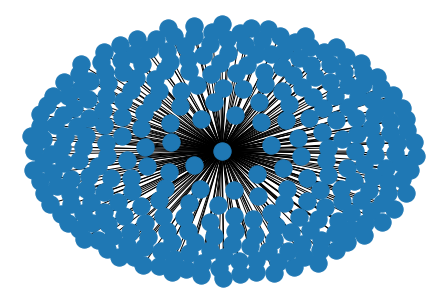

In [10]:
nx.draw(G, with_labels=False, font_weight='bold')

The below section creates a graph network for all papers connected to the single paper chosen above

In [11]:
ref_list = author_paper['title_y']

In [13]:
extended_network = citation_network.loc[citation_network['title_x'].isin(ref_list)]

In [14]:
extended_x_list = extended_network['title_x'].tolist()
extended_y_list = extended_network['title_y'].tolist()

In [15]:
extendedlist = []

for item in zip(extended_x_list,extended_y_list):
    extendedlist.append(item)

In [24]:
G.clear()
G = nx.Graph(extendedlist)

In [33]:
print(G.number_of_nodes())
print(G.number_of_edges())

275
37675


In [36]:
G.edges(data=True)

EdgeDataView([('A Chinese Immigrant Paradox? Low Coronary Heart Disease Incidence but Higher Short‐Term Mortality in Western‐Dwelling Chinese Immigrants: A Systematic Review and Meta‐Analysis', 'A Direct Aspiration First Pass Technique vs Standard Endovascular Therapy for Acute Stroke: A Systematic Review and Meta-Analysis', {}), ('A Chinese Immigrant Paradox? Low Coronary Heart Disease Incidence but Higher Short‐Term Mortality in Western‐Dwelling Chinese Immigrants: A Systematic Review and Meta‐Analysis', 'A Meta-Analysis of the Association of Fracture Risk and Body Mass Index in Women', {}), ('A Chinese Immigrant Paradox? Low Coronary Heart Disease Incidence but Higher Short‐Term Mortality in Western‐Dwelling Chinese Immigrants: A Systematic Review and Meta‐Analysis', 'A Systematic Review and Meta-Analysis Estimating the Expected Dropout Rates in Randomized Controlled Trials on Yoga Interventions', {}), ('A Chinese Immigrant Paradox? Low Coronary Heart Disease Incidence but Higher Sh

In [31]:
node_degree_cutoff = 250

remove_nodes = [node for node,degree in G.degree() if degree < node_degree_cutoff]
G.remove_nodes_from(remove_nodes)

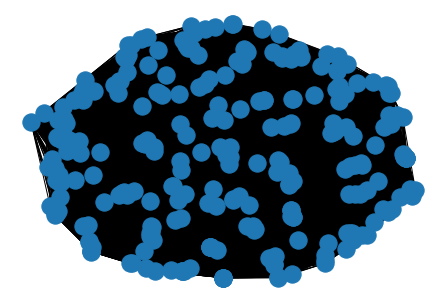

In [38]:
nx.draw(G, with_labels=False, font_weight='bold')
plt.savefig("Graph.png", format="PNG")

In [90]:
print(G.number_of_nodes())
print(G.number_of_edges())

1412
7649


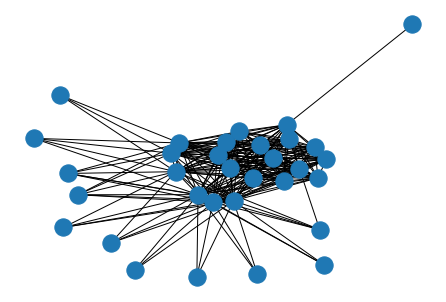

In [44]:
nx.draw(G, with_labels=False, font_weight='bold')